<p align = "center">
<img src="https://academy.sdaia.gov.sa/assets/images/academy-logo.png" align = "center" width="400">
</p>

<p align = "center">
<img src="https://upload.wikimedia.org/wikipedia/ar/9/96/%D8%B4%D8%B9%D8%A7%D8%B1_%D8%A3%D9%83%D8%A7%D8%AF%D9%8A%D9%85%D9%8A%D8%A9_%D8%B7%D9%88%D9%8A%D9%82.png" align = "center" width="400">
</p>
<div> </div>
<div>
<p><br><br></p>
<h1 align="center"><b>GROUP NO.1</b></h1>
<h3 align="center">Anfal </h3>
<h3 align="center">Sara</h3>
<h3 align="center">Manar</h3>
</div>

### P1: Image classification

This is a classic deep learning project that is a great way to learn the basics of how to train and evaluate a neural network. You can use a pre-existing dataset like CIFAR-10 or MNIST, or you can collect your own dataset of images. Your goal is to train a model that can correctly classify images into different categories, whether the labels are for animals, vehicles, or handwritten digits.

In [1]:
import os
from zipfile import ZipFile
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import initializers
from tensorflow.keras import layers, optimizers, datasets
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import random

# 1. Data preparation

In [2]:
# extract zip file

# with ZipFile("archive.zip", 'r') as zObject:
#     zObject.extractall(
#         path="birds_datasets")

In [3]:
main_path = 'birds_datasets'
train_dir = os.path.join(main_path,'train')
test_dir = os.path.join(main_path,'test')
valid_dir = os.path.join(main_path,'valid')

In [4]:
#Limiting the number of classes to 100
class_list = os.listdir(train_dir)
class_list = class_list[:20]

In [5]:
#normalization 
train_pre = ImageDataGenerator(rescale=1./255)
test_pre = ImageDataGenerator(rescale = 1./255)
valid_pre = ImageDataGenerator(rescale = 1./255)

train_main = train_pre.flow_from_directory(
    train_dir,
    classes = class_list,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical'
)

test_main = test_pre.flow_from_directory(
    test_dir,
    classes = class_list,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical'
)

valid_main = valid_pre.flow_from_directory(
    valid_dir,
    classes = class_list,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical'
)

Found 3240 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [6]:
x_train, y_train = next(train_main)
x_test, y_test = next(test_main)
x_val, y_val = next(valid_main)

# number of classes
num_classes = 20

# Convert the labels into one-hot codes.
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)
# y_val = keras.utils.to_categorical(y_val, num_classes)

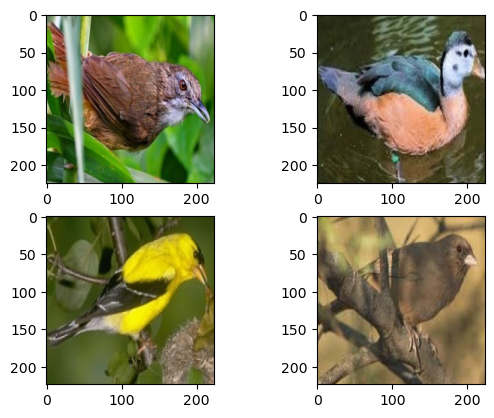

In [7]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(x_train[i])

plt.show()

# 2. Model definition

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

# 3. Model compilation

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizers.Adam(0.001), metrics=['accuracy'])
model_checkpoint = ModelCheckpoint('trained_model.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# 4. Model training

In [23]:
hist = model.fit(x_train, y_train, batch_size=64, 
                 validation_data=(x_val, y_val), epochs=25, verbose=1,
                 callbacks=[model_checkpoint, early_stopping])

Epoch 1/25
1/1 [==============================] - 6s 6s/step - loss: 2.8465 - accuracy: 0.1406 - val_loss: 3.1259 - val_accuracy: 0.0625
Epoch 2/25
1/1 [==============================] - 6s 6s/step - loss: 2.7721 - accuracy: 0.1562 - val_loss: 3.1886 - val_accuracy: 0.0781
Epoch 3/25
1/1 [==============================] - 6s 6s/step - loss: 2.7109 - accuracy: 0.1562 - val_loss: 3.3602 - val_accuracy: 0.0312
Epoch 4/25
1/1 [==============================] - 5s 5s/step - loss: 2.7856 - accuracy: 0.1406 - val_loss: 3.0798 - val_accuracy: 0.0938
Epoch 5/25
1/1 [==============================] - 5s 5s/step - loss: 2.6081 - accuracy: 0.1562 - val_loss: 3.0949 - val_accuracy: 0.0469
Epoch 6/25
1/1 [==============================] - 5s 5s/step - loss: 2.5875 - accuracy: 0.1875 - val_loss: 3.0314 - val_accuracy: 0.0625
Epoch 7/25
1/1 [==============================] - 5s 5s/step - loss: 2.4453 - accuracy: 0.2500 - val_loss: 3.1414 - val_accuracy: 0.0469
Epoch 8/25
1/1 [=========================

In [11]:
# save model
# model.save('birds_classification_model.h5')

# load saved model
# from tensorflow.keras.models import load_model
# new_model = load_model('birds_classification_model.h5')
# new_model.summary()

# 5. Model evaluation

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy %.2f"%test_acc)

2/2 [==============================] - 1s 562ms/step - loss: 3.3963 - accuracy: 0.1094
Test Accuracy 0.11


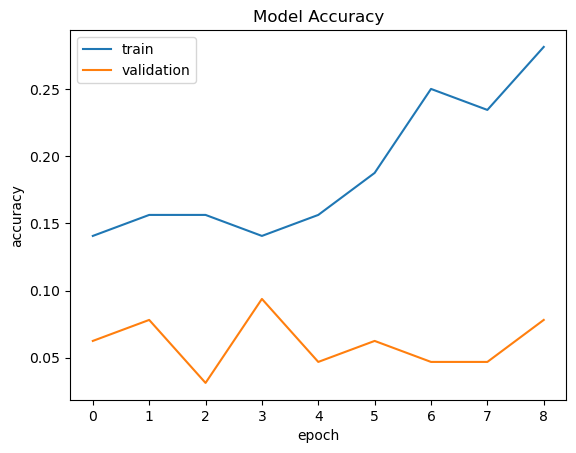

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

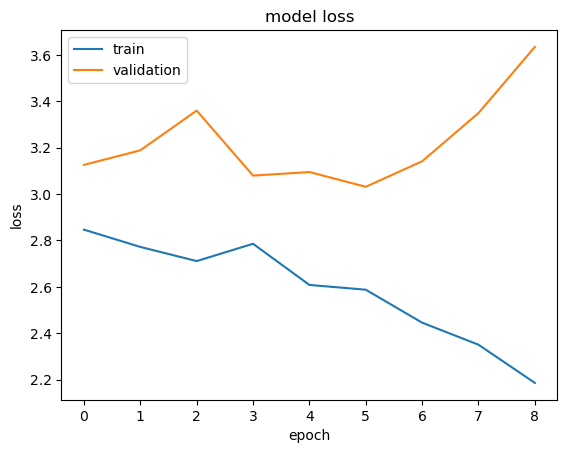

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

[20, 12, 19, 8]
1/1 [==============================] - 0s 96ms/step
prediction results of the 4 images:
6,7,	
3,3,	
first 4 images in the test dataset are in the following format:


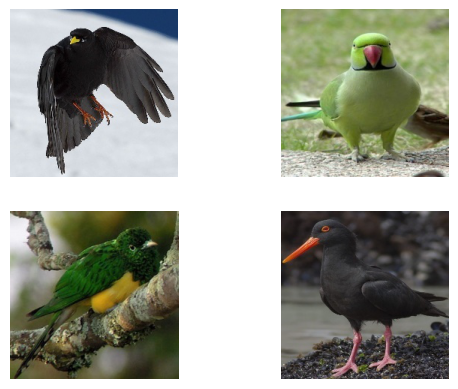

In [27]:
#Generate 4 random images and pridect its class
randomlist = random.sample(range(0, 32), 4)
print(randomlist)


n = 4
classes_x = []
fig, ax = plt.subplots(nrows=int(n/2),ncols=2 )
ax = ax.flatten()

for i in range(len(randomlist)):
    pred_img = model.predict(x_test[randomlist[i]:randomlist[i]+1])
    classes_x.append(int(np.argmax(pred_img,axis=1)))
print(f'prediction results of the {n} images:')

for i in range(len(randomlist)):
    print(classes_x[i],end=',')
    if int((i+1)%2) == 0:
        print('\t')
    # Display images.
    img = x_test[randomlist[i]].reshape((224,224,3))
    # plt.axis("off")
    ax[i].imshow(img)
    ax[i].axis("off")
print(f'first {n} images in the test dataset are in the following format:')

# pre-trained model

In [36]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras import regularizers
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam, Adamax

# Create Model Structure
# pre-trained model efficientnet
base_model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top= False, weights= "imagenet", 
    input_shape= (224, 224, 3), pooling= 'max')

# base_model.trainable = False

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(20, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 batch_normalization_4 (Batc  (None, 1280)             5120      
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 256)               327936    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 20)                5140      
                                                                 
Total params: 4,387,767
Trainable params: 4,343,184
Non-trainable params: 44,583
_______________________________________

In [37]:
# batch_size = 32   # set batch size for training
# epochs =  10  # number of all epochs in training
history = model.fit(x= train_main, epochs= 10, verbose= 1, validation_data= valid_main, 
                    validation_steps= None, shuffle= False)

Epoch 1/10
51/51 [==============================] - 476s 8s/step - loss: 8.2750 - accuracy: 0.6744 - val_loss: 9.3733 - val_accuracy: 0.0600
Epoch 2/10
51/51 [==============================] - 380s 7s/step - loss: 6.1813 - accuracy: 0.9503 - val_loss: 8.2344 - val_accuracy: 0.0500
Epoch 3/10
51/51 [==============================] - 373s 7s/step - loss: 5.0584 - accuracy: 0.9843 - val_loss: 7.4370 - val_accuracy: 0.0500
Epoch 4/10
51/51 [==============================] - 367s 7s/step - loss: 4.1809 - accuracy: 0.9914 - val_loss: 6.6300 - val_accuracy: 0.0400
Epoch 5/10
51/51 [==============================] - 381s 7s/step - loss: 3.4541 - accuracy: 0.9951 - val_loss: 5.9062 - val_accuracy: 0.0900
Epoch 6/10
51/51 [==============================] - 365s 7s/step - loss: 2.8620 - accuracy: 0.9969 - val_loss: 5.0287 - val_accuracy: 0.2100
Epoch 7/10
51/51 [==============================] - 376s 7s/step - loss: 2.3749 - accuracy: 0.9966 - val_loss: 4.1931 - val_accuracy: 0.4100
Epoch 8/10
51

In [39]:
# save model
# model.save('birds_classification_model.h5')

# load saved model
# from tensorflow.keras.models import load_model
# new_model = load_model('birds_classification_model.h5')
# new_model.summary()

In [40]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy %.2f"%test_acc)

2/2 [==============================] - 2s 765ms/step - loss: 2.4302 - accuracy: 0.7031
Test Accuracy 0.70


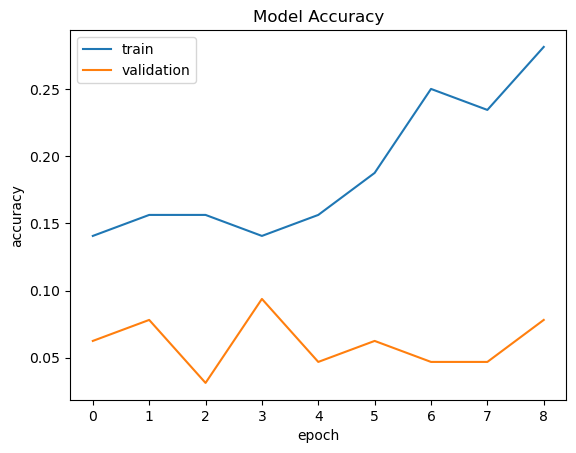

In [41]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

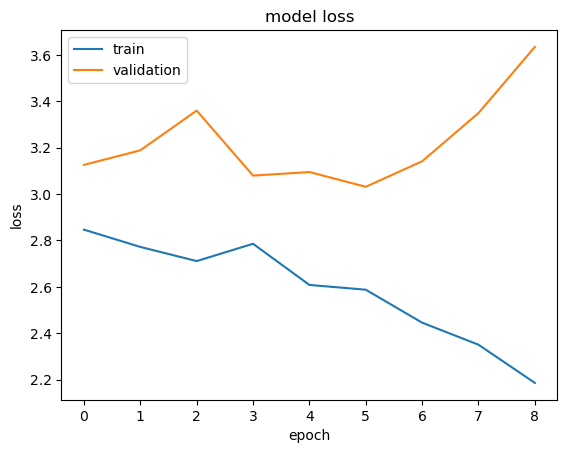

In [42]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

[18, 3, 15, 6]
1/1 [==============================] - 0s 50ms/step
prediction results of the 4 images:
ABYSSINIAN GROUND HORNBILL,AMERICAN FLAMINGO,	
AMERICAN FLAMINGO,ALEXANDRINE PARAKEET,	
first 4 images in the test dataset are in the following format:


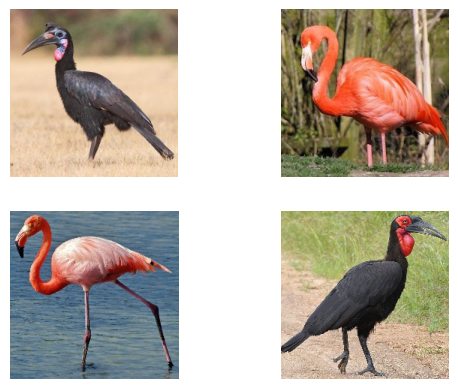

In [71]:
g_dict = test_main.class_indices 
classes = list(g_dict.keys())

#Generate 4 random images and pridect its class
randomlist = random.sample(range(0, 32), 4)
print(randomlist)


n = 4
classes_x = []
fig, ax = plt.subplots(nrows=int(n/2),ncols=2 )
ax = ax.flatten()

for i in range(len(randomlist)):
    pred_img = model.predict(x_test[randomlist[i]:randomlist[i]+1])
    # Make predictions
    score = tf.nn.softmax(pred_img[0])
    classes_x.append(class_labels[tf.argmax(score)])
print(f'prediction results of the {n} images:')

for i in range(len(randomlist)):
    print(classes_x[i],end=',')
    if int((i+1)%2) == 0:
        print('\t')
    # Display images.
    img = x_test[randomlist[i]].reshape((224,224,3))
    ax[i].imshow(img)
    ax[i].axis("off")
print(f'first {n} images in the test dataset are in the following format:')

In [59]:
import keras.utils as image

g_dict = test_main.class_indices 
classes = list(g_dict.keys())
# bird-ABBOTTS-BOOBY.jpg
# bird-AMERICAN-GOLD.jpg
# American_Bittern_bird.jpg
image_path = 'bird-AMERICAN-GOLD.jpg'
image = image.load_img(image_path)
# image = Image.open(image_path)

# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = model.predict(img_array)
class_labels = classes
score = tf.nn.softmax(predictions[0])
print(f"{class_labels[tf.argmax(score)]}")

1/1 [==============================] - 0s 66ms/step
AMERICAN GOLDFINCH
